In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Definição do problema:

- Considerando o dataset `Dataset- Superstore (2015-2018).csv` e a Análise Exploratória de Dados realizada no notebook `Time_Series.ipynb` bem como as previsões feitas segundos os diversos modelos anteriormente apresentados, pretende-se agora a definição de um problema associado a este dataset que possui características temporais bem como traços anteriormente analisados de sazonalidade e tendência que agora serão explorados quanto a:
    
    - Verificar o impacto das features em `Profit` para saber quais delas são mais relevantes para a previsão de `Profit` e `Sales` e, portanto, quais delas devem ser priorizadas em uma estratégia de marketing;

    - Segmentação de perfis de consumidores a fim de identificar padrões de consumo;
    
    - A necessidade de gerar modelos que possam prever o comportamento de `Profit` e `Sales` dada a grande correlação positiva entre elas de modo a aumentar as vendas em períodos de baixa venda/compra pois, conforme analisado anteriormente a respeito das features `Profit`, `Sales`, `Quantity` e `Discount`, há certa correlação entre elas e dada a verificação feita de que há correlação inclusive negativa quanto às relações entre `Discount x Sales` e `Discount x Profit`.

## Loading dataset

In [4]:
df = pd.read_csv('../data/Dataset- Superstore (2015-2018).csv')
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016/11/08  2016/11/11    Second Class    CG-12520   
1       2  CA-2016-152156  2016/11/08  2016/11/11    Second Class    CG-12520   
2       3  CA-2016-138688  2016/06/12  2016/06/16    Second Class    DV-13045   
3       4  US-2015-108966  2015/10/11  2015/10/18  Standard Class    SO-20335   
4       5  US-2015-108966  2015/10/11  2015/10/18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

## Exploratory Data Analysis
Em razão de uma **definição de problema** que envolve a **segmentação de perfis de consumidores**, a fim de **identificar padrões de consumo**, é necessário que sejam analisadas as features que possuem relação com o comportamento de compra dos consumidores, ou seja, `Sales`, `Quantity` e `Discount` e, em razão da necessidade de se prever o comportamento de `Profit` e `Sales`, **justifica-se a necessidade de uma nova Análise Exploratória dos Dados**.

In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Convertendo para **datetime** e criando novas colunas de `month` e `year`

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
#df['Order_Month'] = df['Order Date'].dt.month
#df['Order_Year'] = df['Order Date'].dt.year
#df['Ship_Month'] = df['Ship Date'].dt.month
#df['Ship_Year'] = df['Ship Date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
df.Country.nunique(), df.Country.unique()

(1, array(['United States'], dtype=object))

In [52]:
px.pie(df, names='Segment', title='Segmento de Clientes')

In [55]:
fig = px.histogram(df, x='Segment', y='Sales', color='Segment', title='Vendas por Segmentos de Clientes')
fig.update_layout(yaxis_title='Vendas', xaxis_title='Segmento de Clientes', title_x=0.5)
fig.show()

In [56]:
fig = px.histogram(df, x='Segment', y='Profit', color='Segment', title='Lucro por Segmento de Clientes')
fig.update_layout(yaxis_title='Lucro', xaxis_title='Segmento de Clientes', title_x=0.5)
fig.show()

### Quanto à `Categoria`

In [11]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
px.pie(df, names='Category', title='Categorias de Productos')

In [13]:
fig = px.histogram(df, x='Category', y='Sales', color='Category', title='Vendas por Categoria')
fig.update_layout(yaxis_title='Vendas', xaxis_title='Categorias', title_x=0.5)
fig.show()

In [14]:
fig = px.histogram(df, x='Category', y='Profit', color='Category', title='Lucro por Categoria')
fig.update_layout(yaxis_title='Lucro', xaxis_title='Categorias', title_x=0.5)
fig.show()

### Quanto à `Sub-Categoria`

In [15]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

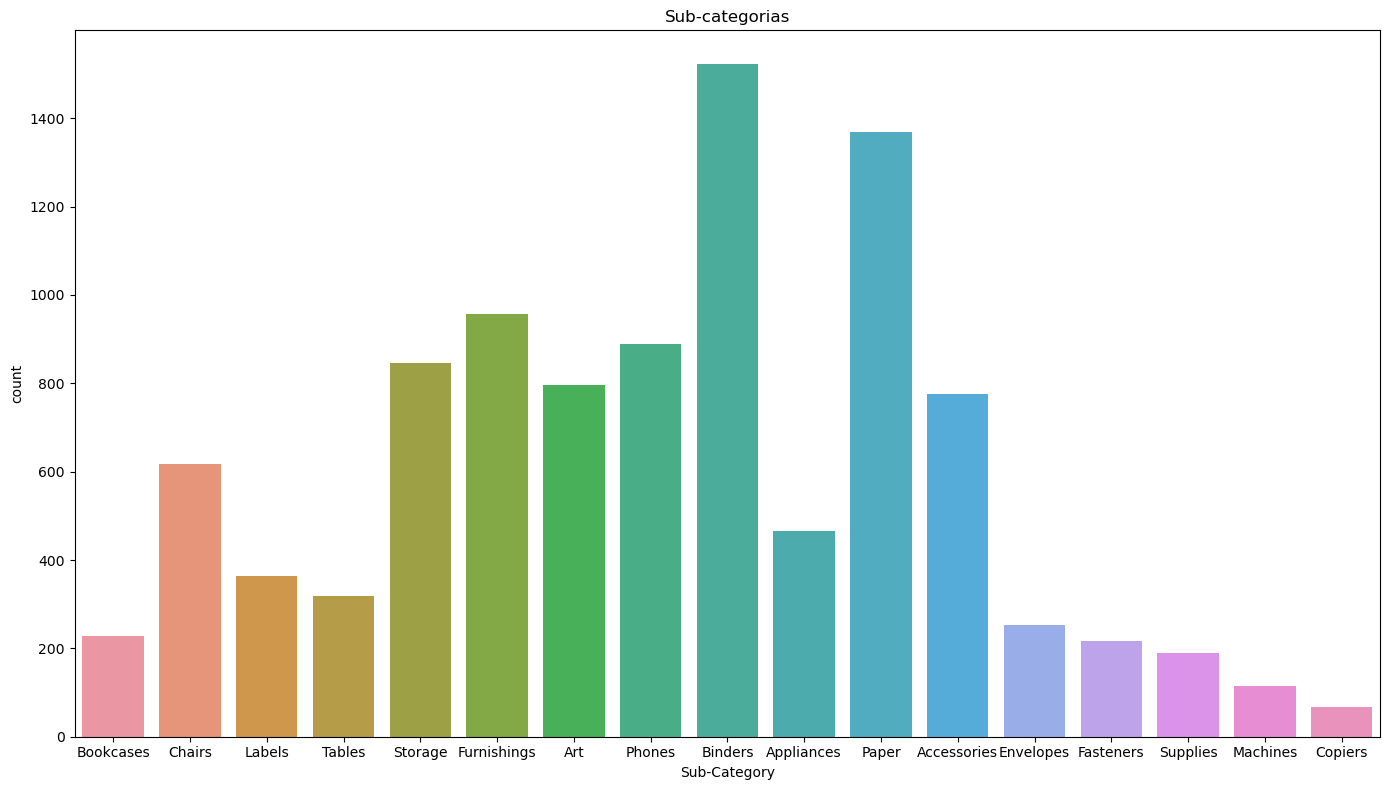

In [16]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Sub-Category', data=df)
plt.title('Sub-categorias')
plt.tight_layout()
plt.show()

Lucro por Sub-Categoria

In [17]:
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

In [49]:
px.bar(df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index(), x='Sub-Category', y='Sales', title='Vendas por Sub-Categoria', color='Sub-Category')

In [46]:
px.bar(df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index(), x='Sub-Category', y='Profit', title='Lucro por Sub-Categoria', color='Sub-Category')

In [44]:
fig = px.bar(df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index(), x='Sub-Category', y='Sales', title='Vendas e Lucro por Sub-Categoria')
fig.update_layout(xaxis_title='Sub-Categoria', yaxis_title='Vendas', title_x=0.5)
fig.add_trace(go.Bar(x=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index()['Sub-Category'], y=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index()['Profit'], name='Lucro'))
fig.show()

### Quanto à `City`

In [62]:
df.City.nunique()

531

In [64]:
df.City.value_counts().sort_values(ascending=False).head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

In [86]:
px.bar(df.City.value_counts().sort_values(ascending=False).head(10).reset_index(), x='index', y='City', title='Cidades com mais Vendas', color='index')

In [88]:
px.bar(df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10).reset_index(), x='City', y='Profit', title='Cidades com mais Lucro', color='City')

### Quanto ao `State`

In [75]:
df.State.nunique()

49

In [76]:
df.State.value_counts().sort_values(ascending=False).head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [85]:
us_states = [
    "Alabama",
    "Alaska",
    "Arizona",
    "Arkansas",
    "California",
    "Colorado",
    "Connecticut",
    "Delaware",
    "District of Columbia",
    "Florida",
    "Georgia",
    "Hawaii",
    "Idaho",
    "Illinois",
    "Indiana",
    "Iowa",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Maine",
    "Maryland",
    "Massachusetts",
    "Michigan",
    "Minnesota",
    "Mississippi",
    "Missouri",
    "Montana",
    "Nebraska",
    "Nevada",
    "New Hampshire",
    "New Jersey",
    "New Mexico",
    "New York",
    "North Carolina",
    "North Dakota",
    "Ohio",
    "Oklahoma",
    "Oregon",
    "Pennsylvania",
    "Rhode Island",
    "South Carolina",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Utah",
    "Vermont",
    "Virginia",
    "Washington",
    "West Virginia",
    "Wisconsin",
    "Wyoming"
]

len(us_states)

51

`State`s onde não há orders.

In [84]:
for state in us_states:
    if state not in df.State.unique():
        print(state)

Alaska
Hawaii


In [82]:
px.histogram(df, x='State', y='Sales', color='State', title='Vendas por Estado')

In [83]:
px.histogram(df, x='State', y='Profit', color='State', title='Lucro por Estado')

### Quanto à `Region`

In [57]:
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [58]:
px.histogram(df, x='Region', y='Sales', color='Region', title='Vendas por Região')

In [59]:
px.histogram(df, x='Region', y='Profit', color='Region', title='Lucro por Região')

## Conclusões
* Quanto aos dados:
    - Os dados se referem a vendas realizadas num único país: `United States`. Faz sentido remover este em fase de preprocessamento.

* Quanto ao `Segmento` de Clientes:
    - `Consumers` é o **segmento de cliente** com maior número de vendas, seguido por `Corporate` e por fim `Home Office`.

* Quanto a `Categorias`:
    - Produtos de tecnologia (`Technology`) são os **mais vendidos**, seguidos por mobília (`Furniture`) e por fim produtos de escritório (`Office Suplies`).
    - Apesar do número de vendas,`Furniture` possui **lucro extremamente baixo**.
    - Percebe-se que em relação aos produtos de `Technology`, a relação das vendas com o Lucro é bem semelhante já a relação entre as vendas de `Office Supplies` e seu lucro, nota-se uma certa diferença indicando inclusive que com um número sensivelmente menor de vendas, obtém-se um bom lucro.

* Quanto a `Sub-Categorias`:
    - `Phone` e `Chairs` são os produtos **mais vendidos**, seguidos por `Storage`, `Table` e `Binders`.
    - `Copiers` apresentam o **melhor lucro**, seguidos por `Phones`, `Acessories`, `Paper` e `Binders`.
    - Apesar do bom número de vendas, `Tables` teve **déficit**

* Quanto a `City`:
    - `New York City` teve o **maior número de vendas**, seguido por `Los Angeles`, `Philadelphia`, `San Francisco` e `Seattle`.
    - `New York City` teve o **melhor lucro**, seguido por `Los Angeles`, `Seattle`, `San Francisco` e `Detroit`.
* Quanto a `State`:
    - Percebe-se tanto pelo **número de vendas** quanto pelo **lucro**, que os `State`s da `California` e `New York`tiveram maior destaque.
    - `Texas`, `Ohio` e `Pennsylvania` o maior **déficit**.
    
* Quanto a `Region`:
    - O comportamento das vendas e lucros nas cidades e estados anteriormente mencionados está expresso também nas `Region`s com maior número de vendas e melhor lucro: `West` e `East`.
    - O número de vendas de `Central` é maior que estados do `South`, mas os lucros foram melhores nos estados do `South` do que em `Central`.

## Análise dos tipos das Features

Date Features 

In [20]:
date_features = ['Order Date', 'Ship Date']
print(f'Date features:\n', *date_features, sep='\n- ',
    end=f'\n\nNumber of date features: {len(date_features)}')

Date features:

- Order Date
- Ship Date

Number of date features: 2

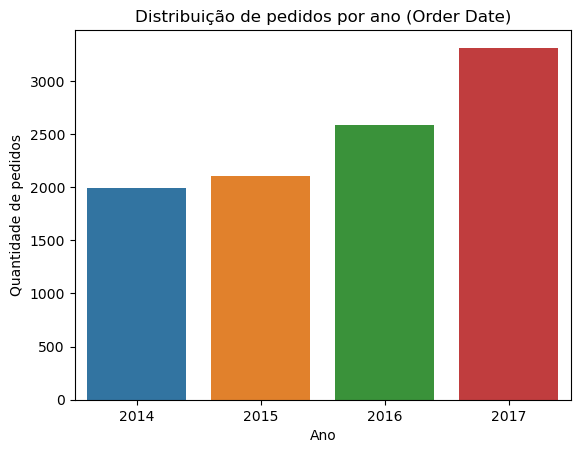

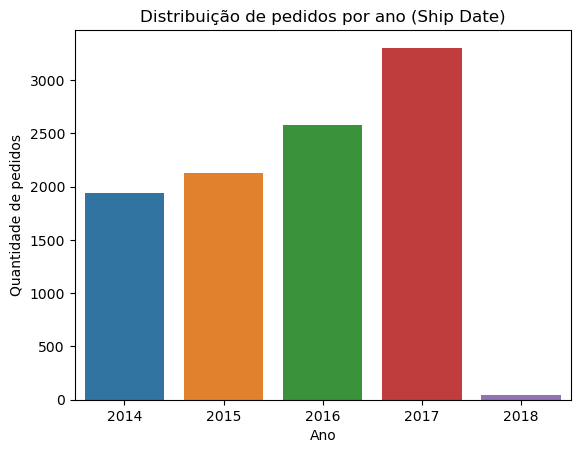

In [21]:
for item in date_features:
    sns.countplot(x=df[item].dt.year, data=df)
    plt.title(f'Distribuição de pedidos por ano ({item})')
    plt.xlabel('Ano')
    plt.ylabel('Quantidade de pedidos')
    plt.xticks(rotation=0)
    plt.show()

Irrelevant features

In [22]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
irrelevant_features = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Ship Date', 'Product ID', 'City', 'State', 'Country', 'Region', 'Product Name']
print(f'Irrelevant features:\n', *irrelevant_features, sep='\n- ',
    end=f'\n\nNumber of irrelevant features: {len(irrelevant_features)}')

Irrelevant features:

- Row ID
- Order ID
- Customer ID
- Customer Name
- Postal Code
- Ship Date
- Product ID
- City
- State
- Country
- Region
- Product Name

Number of irrelevant features: 12

Numeric features

In [24]:
numerical_features = list(df._get_numeric_data().columns)
numerical_features = [feature for feature in numerical_features if feature not in irrelevant_features]

print(f'Numerical features:\n', *numerical_features, sep='\n- ',
    end=f'\n\nNumber of numerical features: {len(numerical_features)}')

Numerical features:

- Sales
- Quantity
- Discount
- Profit

Number of numerical features: 4

Categorical features

In [25]:
categorical_features = list(set(df.columns) - set(numerical_features) - set(date_features) - set(irrelevant_features))

print(f'Categorical features:\n', *categorical_features, sep='\n- ',
    end=f'\n\nNumber of categorical features: {len(categorical_features)}')

Categorical features:

- Sub-Category
- Segment
- Ship Mode
- Category

Number of categorical features: 4

## Split Dataset into Train and Test

In [26]:
train_df = df.query('`Order Date` < "2017-01-01"')
test_df = df.query('`Order Date` >= "2017-01-01"')

In [27]:
print(f'Treino: {train_df.shape[0]}\nTeste:  {test_df.shape[0]}\nTotal:  {df.shape[0]}\n')

if train_df.shape[0] + test_df.shape[0] == df.shape[0]:
    print('Dados consistentes de Treino e Teste!')
else:
    print('Dados inconsistentes de Treino e Teste!')

Treino: 6682
Teste:  3312
Total:  9994

Dados consistentes de Treino e Teste!


In [28]:
fig = px.line(train_df.sort_values('Order Date'), x='Order Date', y='Sales', title='Train and Test split', color_discrete_sequence=['blue'])
fig.add_scatter(x=test_df.sort_values('Order Date')['Order Date'], y=test_df.sort_values('Order Date')['Sales'], mode='lines', line=dict(color='red'))
fig.update_layout(xaxis_title='Order Date', yaxis_title='Sales', title_x=0.5)
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)), showlegend=False)
fig.show()

## Preprocessor pipeline

In [29]:
from sklearn.pipeline import FunctionTransformer, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def preprocess_features(df: pd.DataFrame, train_df: pd.DataFrame, test_df: pd.DataFrame,
                        target_feature: pd.DataFrame,
                        numeric_features: list, categorical_features: list,
                        date_features: list, irrelevant_features: list):
    """
    Preprocesses the dataset by:
    - Dropping irrelevant features
    - Imputing missing values
    - Encoding categorical features
    - Scaling numerical features
    - Creating new features
    - Splitting the dataset into train and test sets
    """
    
    # Impute missing values
    numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), StandardScaler()
    )
    
    # Missing_values categoricos -> valor constante
    # OneHotEncoder -> variáveis categóricas
    categorical_transformer = make_pipeline(
        SimpleImputer(strategy="constant", fill_value="missing"),
        OneHotEncoder(handle_unknown="ignore", sparse=False),
    )
    
    # cria um preprocessador para aplicar as transformações definidas acima
    preprocessor = make_column_transformer(
        (numeric_transformer, numeric_features),
        (categorical_transformer, categorical_features),
        
        ("drop", irrelevant_features))
       
    preprocessor.fit(train_df)
    
    # tira os nomes das features
    ohe_feature_names = (
        preprocessor.named_transformers_["pipeline-2"]
        .named_steps["onehotencoder"]
        .get_feature_names_out(categorical_features)
        .tolist()
    )

    # combina as colunas das features numericas e as das geradas por one hot encoder
    new_columns = numeric_features + ohe_feature_names

    # aplica a transformação para os conjuntos de treino e teste
    X_train_enc = pd.DataFrame(
        preprocessor.transform(train_df), index=train_df.index, columns=new_columns
    )
    X_test_enc = pd.DataFrame(
        preprocessor.transform(test_df), index=test_df.index, columns=new_columns
    )

    # cria os conjuntos de treino e teste para a variável alvo
    y_train = train_df[target_feature]
    y_test = test_df[target_feature]

    return X_train_enc, y_train, X_test_enc, y_test, preprocessor

In [30]:
help(preprocess_features)

Help on function preprocess_features in module __main__:

preprocess_features(df: pandas.core.frame.DataFrame, train_df: pandas.core.frame.DataFrame, test_df: pandas.core.frame.DataFrame, target_feature: pandas.core.frame.DataFrame, numeric_features: list, categorical_features: list, date_features: list, irrelevant_features: list)
    Preprocesses the dataset by:
    - Dropping irrelevant features
    - Imputing missing values
    - Encoding categorical features
    - Scaling numerical features
    - Creating new features
    - Splitting the dataset into train and test sets



Definindo o target para `Sales`

In [31]:
target_feature = ['Sales']

Aplicando o pipeline de preprocessamento

In [32]:
X_train_enc, y_train, X_test_enc, y_test, preprocessor = preprocess_features(
    df, train_df, test_df, target_feature,
    numerical_features,
    categorical_features,
    date_features,
    irrelevant_features)

/home/tg/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [33]:
X_train_enc.head()

Sales  Quantity  Discount    Profit  Sub-Category_Accessories  \
0  0.043513 -0.808743 -0.757754  0.056582                       0.0   
1  0.776490 -0.359643 -0.757754  0.827716                       0.0   
2 -0.342236 -0.808743 -0.757754 -0.095512                       0.0   
3  1.128393  0.538557  1.427073 -1.787805                       0.0   
4 -0.330152 -0.808743  0.213280 -0.114414                       0.0   

   Sub-Category_Appliances  Sub-Category_Art  Sub-Category_Binders  \
0                      0.0               0.0                   0.0   
1                      0.0               0.0                   0.0   
2                      0.0               0.0                   0.0   
3                      0.0               0.0                   0.0   
4                      0.0               0.0                   0.0   

   Sub-Category_Bookcases  Sub-Category_Chairs  ...  Segment_Consumer  \
0                     1.0                  0.0  ...               1.0   
1                     0.0                  1.0  ...               1.0   
2                     0.0                  0.0  ...               0.0   
3                     0.0                  0.0  ...               1.0   
4                     0.0                  0.0  ...               1.0   

   Segment_Corporate  Segment_Home Office  Ship Mode_First Class  \
0                0.0                  0.0                    0.0   
1                0.0                  0.0                    0.0   
2                1.0                  0.0                    0.0   
3                0.0                  0.0                    0.0   
4                0.0                  0.0                    0.0   

   Ship Mode_Same Day  Ship Mode_Second Class  Ship Mode_Standard Class  \
0                 0.0                     1.0                       0.0   
1                 0.0                     1.0                       0.0   
2                 0.0                     1.0                       0.0   
3                 0.0                     0.0                       1.0   
4                 0.0                     0.0                       1.0   

   Category_Furniture  Category_Office Supplies  Category_Technology  
0                 1.0                       0.0                  0.0  
1                 1.0                       0.0                  0.0  
2                 0.0                       1.0                  0.0  
3                 1.0                       0.0                  0.0  
4                 0.0                       1.0                  0.0  

[5 rows x 31 columns]

Verificando consistência dos dados

In [34]:
print(f'- Treino:\n    Uncoded: {train_df.shape[0]}\n    Encoded: {X_train_enc.shape[0]}\n\n- Total:  {df.shape[0]}\n')

if X_train_enc.shape[0] == train_df.shape[0]:
    print('Dados consistentes de Treino Uncoded e Encoded!')
else:
    print('Dados inconsistentes de Treino Uncoded e Encoded!')

- Treino:
    Uncoded: 6682
    Encoded: 6682

- Total:  9994

Dados consistentes de Treino Uncoded e Encoded!


In [35]:
y_train.head(), y_train.shape

(      Sales
 0  261.9600
 1  731.9400
 2   14.6200
 3  957.5775
 4   22.3680,
 (6682, 1))

In [36]:
y_test.head(), y_test.shape

(      Sales
 12   15.552
 23   71.372
 34   29.472
 41  147.168
 43   95.616,
 (3312, 1))